In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

__Using KNN Classifier__

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state= 2) # (flattened 2d array,1d array)

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)   #n_neighbours is nothing but k =3

In [7]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
knn_model.score(X_test,y_test)

0.9861111111111112

In [9]:
knn_pred = knn_model.predict(X_test)
knn_pred

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 7, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7,
       7, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1,
       0, 3, 4, 3, 0, 7, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

__Cross Validation__ default cv = 5 (can be changed)

In [11]:
from sklearn.model_selection import cross_val_score  # default n_splits= 5.Train test split is not required for C-validation

In [12]:
cross_val_score(knn_model,digits.data,digits.target,cv=3) # using cv =3

array([0.96494157, 0.96661102, 0.97328881])

__Parameter Tuning using For Loop__ (Default CV is 5, iterating through 1-10 values of K)

In [15]:
# Iterating through each n_neighbor= 1 to 10 and finding the scores 
neighbor_range=list(range(1,10))               # list of C values
avg_scores = {}                                # dictionary 
for i in neighbor_range:
        cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=i),digits.data,digits.target,cv=3) # cv: default = 5
        print(cv_scores)
        avg_scores[str(i)] = np.average(cv_scores) #averages the 5 scores and adds to dictionary
avg_scores

[0.95659432 0.96994992 0.96494157]
[0.95826377 0.96327212 0.96494157]
[0.96494157 0.96661102 0.97328881]
[0.95659432 0.96661102 0.96828047]
[0.95826377 0.96327212 0.96661102]
[0.95492487 0.96327212 0.96160267]
[0.94991653 0.96327212 0.96494157]
[0.94824708 0.96160267 0.96160267]
[0.94824708 0.95659432 0.96494157]


{'1': 0.9638286032276016,
 '2': 0.9621591541457986,
 '3': 0.9682804674457429,
 '4': 0.9638286032276016,
 '5': 0.9627156371730662,
 '6': 0.9599332220367279,
 '7': 0.9593767390094602,
 '8': 0.9571508069003896,
 '9': 0.9565943238731219}

In [29]:
max(avg_scores,key= avg_scores.get) #prints the key with max value in dictionary.

'3'

In [27]:
max(avg_scores.values()) #prints the maximum value in dictionary

0.9682804674457429

In [33]:
max(avg_scores.keys()) #this will just print the highest key number, not the key with highest value.

'9'

__Parameter Tuning Using GridSearch CV__ (Default CV is 5, iterating through 1-10 values of K using gridsearchCV)

In [16]:
from sklearn.model_selection import GridSearchCV #takes (estimator, param_grid, cv)

In [17]:
gridcv_model = GridSearchCV(KNeighborsClassifier(),
                   {'n_neighbors':list(range(1,10))},
                   cv = 5)

gridcv_model.fit(digits.data,digits.target)
gridcv_model.cv_results_  #results generated are key value pairs.Not easy to view. Creating pandas dataframe of results below.

{'mean_fit_time': array([0.00180297, 0.00120196, 0.00140104, 0.00160227, 0.00180202,
        0.00220213, 0.00140233, 0.00140204, 0.00160141]),
 'std_fit_time': array([0.00040057, 0.00039966, 0.00048961, 0.00049035, 0.00074821,
        0.00040002, 0.00049021, 0.0004886 , 0.00049033]),
 'mean_score_time': array([0.0460288 , 0.03942523, 0.04442916, 0.05023212, 0.0690455 ,
        0.06704383, 0.04702978, 0.04723048, 0.0524343 ]),
 'std_score_time': array([0.00718825, 0.00257905, 0.00422775, 0.00421685, 0.0261788 ,
        0.0203706 , 0.00400141, 0.00204144, 0.00484495]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors

In [18]:
grid_df = pd.DataFrame(gridcv_model.cv_results_ )  #converting the above generated results to dataframe
grid_df   # returned whole lot of different parameter  values 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001803,0.000401,0.046029,0.007188,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.001202,0.000400,0.039425,0.002579,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.001401,0.000490,0.044429,0.004228,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.001602,0.000490,0.050232,0.004217,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.001802,0.000748,0.069045,0.026179,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.002202,0.000400,0.067044,0.020371,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.001402,0.000490,0.047030,0.004001,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.001402,0.000489,0.047230,0.002041,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,8
8,0.001601,0.000490,0.052434,0.004845,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9


In [19]:
grid_df = grid_df[['param_n_neighbors','mean_test_score']] # selecting the required columns only
grid_df

,param_n_neighbors,mean_test_score
0,1,0.964393
1,2,0.967171
2,3,0.966622
3,4,0.963841
4,5,0.962728
5,6,0.959386
6,7,0.959946
7,8,0.958276
8,9,0.956611


In [21]:
gridcv_model.best_score_ #returns the best score out of all the combinations

0.9671711544413494

In [23]:
gridcv_model.best_params_ # returns the best combination

{'n_neighbors': 2}

__Confusion Matrix and Classification report__(for k = 3 : No cross cv and hyperparameter tuning used)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 27]], dtype=int64)

Text(24.0, 0.5, 'True')

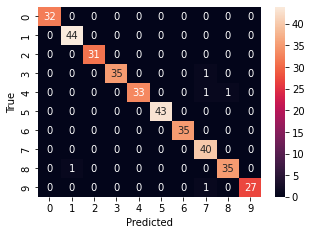

In [35]:
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.99        36
           4       1.00      0.94      0.97        35
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        35
           7       0.93      1.00      0.96        40
           8       0.97      0.97      0.97        36
           9       1.00      0.96      0.98        28

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

